# Application d'analyse des données de Formule 1 saison 2022
celle que je peux récupérer en tout cas

Cette application est réutilisable pour les prochaines saisons

## Imports

In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.express as px
import chart_studio.plotly as py
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import json

## Backend
dans cette partie, je fais tous ce qui ne relève pas de l'affichage des graphs.
Cela permet d'avoir directement toutes les données d'un coup pour ensuite juste avoir a
choisir le graph a afficher

In [38]:
# import data
data_points = pd.read_csv('data/race_points.csv', sep=",")
data_all = pd.read_csv("data/all.csv", sep=",")

data_points_cumsum = data_points.cumsum()
with open("teams.json") as jsonfile:
    teams_pilot = json.load(jsonfile)
data_team_points = {}
# pour chaque équipe on fait la somme des points de chaque pilote de l'équipe
for team in teams_pilot:
    data_team_points[team] = []
    for rnd in range(data_points.shape[0]):
        data_team_points[team].append(0)
        for pl in teams_pilot[team]:
            data_team_points[team][rnd] += data_points[pl][rnd]
data_team_points = pd.DataFrame(data_team_points).fillna(0)
data_team_cumsum = data_team_points.cumsum()

# init constants
order = ["ham","rus","ver","per","lec","sai","gas","tsu","ric","nor","oco","alo","vet","str","lat","alb","bot","zho","mag","sch"]
colors = {
    "ham": "#00AA88",
    "rus": "#3C9E8C",
    "ver": "#0000FF",
    "per": "#00006E",
    "lec": "#FF0000",
    "sai": "#5E0101",
    "gas": "#555555",
    "tsu": "#999999",
    "ric": "#FF8C00",
    "nor": "#BA7827",
    "oco": "#FF8AFF",
    "alo": "#C75BC7",
    "vet": "#27542B",
    "str": "#1D9929",
    "lat": "#697DFF",
    "alb": "#293587",
    "bot": "#FF00A2",
    "zho": "#AB006C",
    "mag": "#5C0099",
    "sch": "#9900FF"
}
teams = {
    "redbull": "#FF00FF",
    "mrecedes": "#00FFFF",
    "ferrari": "#FF0000",
    "mclaren": "#FFAA00",
    "alpine": "#FFC0CB",
    "alphatauri": "#AAAAAA",
    "astonmartin": "#00FF00",
    "williams": "#0000FF",
    "alfaromeo": "#000000",
    "haas": "#FFFF00"
}

## Frontend
Ici les affichages seront séparé pour pouvoir choisir ce qu'on affiche

### Test data import

In [33]:
print(data_all.head())

  pilot  avg_speed  best_lap  grid  points  result      time  Unnamed: 7
0   ham    202.469    96.228   5.0      15     3.0  5863.259         NaN
1   rus    202.313    96.302   9.0      12     4.0  5864.795         NaN
2   ver    204.140    95.440   2.0       0    19.0       NaN         NaN
3   per    202.762    96.089   4.0       0    18.0       NaN         NaN
4   lec    206.018    94.570   1.0      26     1.0  5853.584         NaN


### nuage de point
un graph avec la position sur la grille en x, et le classement en y. cela permet de predire si l'ordre de la grille est conservé

In [34]:
px.scatter(data_all, x="grid", y="result", color="pilot", title="Classement par pilote", template="plotly_dark")

toujours un nuage de point, mais avec les temps totaux en x et temps du meilleur tour en y

In [35]:
px.scatter(data_all, x="time", y="best_lap", color="pilot", title="Meilleur temps par pilote", template="plotly_dark")

### Heatmap

Ici je vais faire toutes les heatmap.

la première ci-dessous est grid/result

In [36]:
px.density_heatmap(data_all, x="grid", y="result", title="resultat en fonction de la grille", template="plotly_dark")

### Evolutions

Ici c'est les courbes d'evolutions au cours de la saison

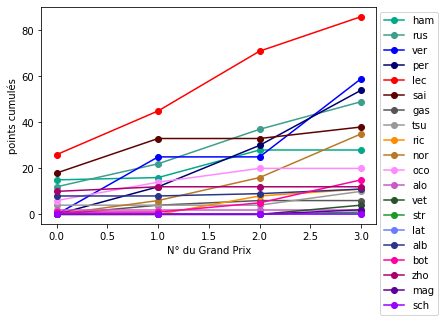

In [39]:
for pilot in order:
    plt.plot(data_points_cumsum[pilot], color=colors[pilot], label=pilot, marker="o")
plt.xlabel("N° du Grand Prix")
plt.ylabel("points cumulés")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

Et même chose mais pour les écuries

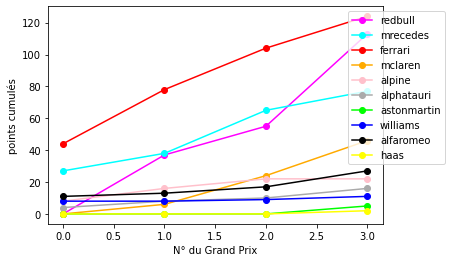

In [40]:
for team in teams:
    plt.plot(data_team_cumsum[team], color=teams[team], label=team, marker="o")
plt.xlabel("N° du Grand Prix")
plt.ylabel("points cumulés")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))